In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [6]:
data = np.genfromtxt('MultiVarLR - MultiVarLR.csv',delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

## BFGS
- ImpleGeneralize <b>BFGS</b> as a function to work for MultiVariables
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.


In [29]:
def bfgs_multi(data,lr,e,it):  
    
    #prepare x(featuers),y(lable)
    d_row,d_col=data.shape

    x = data[:,:-1]
    x=np.concatenate((np.ones(d_row)[:,np.newaxis],x),axis=1)
    y=data[:,-1].reshape(-1,1)
  
    #prepare I and B_inv // B_inv = B.T 
    I,B_inv = np.zeros((d_col,d_col)),np.zeros((d_col,d_col))
    np.fill_diagonal(I, 1)
    np.fill_diagonal(B_inv, 1)

    #prepare theta0=theata-1 , theta1=theta0 another way for nameing 
    theta0 = np.zeros(data.shape[1]).reshape(-1,1)
    theta1=np.full((data.shape[1]), .01).reshape(-1,1)
    

    i=0
    cost = []
    while(True):
        print(f'****************** Epoch {i} ********************')

        #prediction for theta0,theta1
        y_pr0 = x@theta0
        y_pr1 = x@theta1
        print (f'h(x0):{y_pr0}\n')
        print (f'h(x1):{y_pr1}\n')

        #error for theta0,theta1
        error0 = y_pr0-y
        error1 = y_pr1-y
        print (f'Error0 Vector:{error0}\n')
        print (f'Error1 Vector:{error1}\n')


        cost.append((error1.T@error1)/(2*d_row))
        print (f'cost={cost[i]}')


        grad_thetas0 = x.T@error0/d_row
        grad_thetas1 = x.T@error1/d_row
        print(f'Gradient0 Vector:{grad_thetas0}\n')
        print(f'Gradient1 Vector:{grad_thetas1}\n')

        grad_vec_norm = np.linalg.norm(grad_thetas1)
        print(f'Gradient Vector Norm:{grad_vec_norm}')


        if(i < it and grad_vec_norm >= e):

          delta_theta = theta1 - theta0
          grid = (grad_thetas1 - grad_thetas0).T
          B_inv = (I - (delta_theta@grid)/(grid@delta_theta))@B_inv@((I - (grid.T@delta_theta.T)/(grid@delta_theta))) +((delta_theta@delta_theta.T)/(grid@delta_theta))
          theta0 = theta1
          theta1 = theta1- lr*(B_inv@grad_thetas1)
          print(f'New theta0 Vector:{theta0}\n')
          print(f'New theta1 Vector:{theta1}\n')

          i += 1 

        else :
            break 

          
    if i != it-1:        #do not print if iter finshed
            print(f'\n\nGradient Descent converged after {i+1} epochs\n')
            print ((f'thetas_Opt :{grad_thetas1} \n'))
            print(f'Error Vector:{error1}\n')
            print(f'Cost :{cost}\n')
            print(f'h(x) = y_predict:{y_pr1}')
            print(f'y_actual:{y}')
      #      print(f'cost_len:{len(costs)},th_len:{len(thetas)}')
            print(f'Accurcey:{r2_score(y,y_pr1)}')  



    return cost , y_pr1      


In [41]:
costs,h_yhat= bfgs_multi(data,1,1e-08,500)


****************** Epoch 0 ********************
h(x0):[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

h(x1):[[2.29]
 [2.75]
 [2.71]
 [2.95]
 [2.1 ]
 [1.55]
 [2.21]
 [1.64]
 [2.57]
 [2.38]
 [2.13]
 [2.1 ]
 [2.8 ]
 [2.33]
 [2.22]
 [2.79]
 [2.22]
 [2.65]
 [2.67]
 [2.39]
 [2.59]
 [2.58]
 [2.47]
 [2.31]
 [2.85]]

Error0 Vector:[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]

Error1 Vector:[[-149.71]
 [-182.25]
 [-177.29]
 [-193.05]
 [-139.9 ]
 [ -99.45]
 [-146.79]
 [-113.36]
 [-172.43]
 [-161.62]
 [-138.87]
 [-138.9 ]
 [-181.2 ]
 [-149.67]
 [-145.78]
 [-189.21]
 [-144.78]
 [-180.35]
 [-174.33]
 [-156.61]
 [-174.41]
 [-172.42]
 [-172.53]
 [-146.69]
 [-189.15]]

cost=[[13010.421858]]
Gradient0 Vector:[[  -162.04]
 [

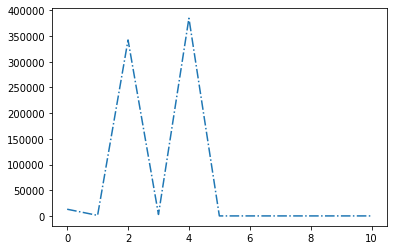

In [42]:
plt.plot(np.concatenate(costs,axis=0),'-.')
